In [1]:
import gym
import matplotlib.pyplot as plt
import time
import numpy as np
from skimage.measure import block_reduce


In [2]:
def roll_append(np_array, item):
    new_array = np.roll(np_array, -1, axis=0)
    new_array[-1, ...] = item
    return new_array

In [3]:
ER_SIZE = 5000
CUR_STATE_SIZE = 4

states = np.zeros((ER_SIZE, 2, 84, 84, CUR_STATE_SIZE))
actions = np.zeros(ER_SIZE)
rewards = np.zeros(ER_SIZE)

CUR_STATE_SIZE = 4
cur_state = np.zeros((CUR_STATE_SIZE, 84, 84))

In [4]:
def preprocess_image(image):
    image = image[29:197, :, :]
    bw = np.pad(np.dot(image, [0.2989, 0.5870, 0.1140]), [(0,0), (4,4)], mode='minimum')
    res = block_reduce(bw, (2,2), np.max)
    
    del image
    del bw
    return res 


def get_state(observation):
    global cur_state
    cur_state = roll_append(cur_state, observation)
    return np.moveaxis(cur_state, 0, 2)


env = gym.make('Pong-v0')
for i_episode in range(1):
    observation = env.reset()
    observation_processed = preprocess_image(observation)
    state = get_state(observation_processed)
    
    for t in range(100):
        #env.render()\
        if t > 20:
            plt.figure()
            plt.imshow(observation_processed, cmap=plt.get_cmap('gray'))
            plt.show()
        time.sleep(0.01)
        print(observation.shape)
        action = env.action_space.sample()
        observation_new, reward, done, info = env.step(action)
        observation_new_processed = preprocess_image(observation_new)
        state_new = get_state(observation_processed)
        
        
        
        states = roll_append(states, [state, state_new])
        actions = roll_append(actions, action)
        rewards = roll_append(actions, reward)
        
        state = state_new
        
        if done:
            print("Episode finished after {} timesteps".format(t + 1))
            break
env.close()

(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)


KeyboardInterrupt: 

In [13]:
import time


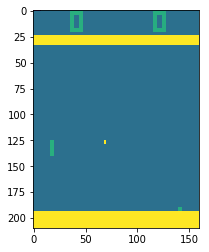

In [39]:
plt.imshow(np.dot(observation, [0.2989, 0.5870, 0.1140]))
plt.show()

In [48]:
STATE_TIME_FRAMES = 4
cur_state = np.array(range(STATE_TIME_FRAMES))
cur_state

array([0, 1, 2, 3])

In [49]:
for i in range(10,15):
    cur_state = np.roll(cur_state, -1)
    cur_state[-1] = i
    print(cur_state)

[ 1  2  3 10]
[ 2  3 10 11]
[ 3 10 11 12]
[10 11 12 13]
[11 12 13 14]


In [74]:
def roll_append(np_array, item):
    new_array = np.roll(np_array, -1, axis=0)
    new_array[-1, ...] = item
    return new_array

In [67]:
new_s = preprocess_image(observation)

In [68]:
new_s.shape

(80, 80)

In [59]:

block_reduce(new_s, (2,2), np.max).shape

(80, 80)

In [76]:
roll_append(np.zeros((4, 80,80)), new_s)

array([[[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        ...,
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ]],

       [[  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        ...,
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,
           0.    ],
        [  0.    ,   0.    ,   0.    , ...,   0.

In [20]:
arr = np.array([[1,2,3],[4,5,6]])

In [21]:
arr[1, 0]

4

In [26]:
arr.swapaxes(0,1)[0, 1]

4

In [3]:
import numpy as np
[np.array([1,3,5]), 5]

[array([1, 3, 5]), 5]

In [4]:
from collections import deque

In [6]:
a = deque(maxlen=4)

In [11]:
a.append(5)

In [12]:
a

deque([5, 5, 5, 5])

In [13]:
np.array(a)

array([5, 5, 5, 5])

In [14]:
import gym
import matplotlib.pyplot as plt
import time
import numpy as np
from skimage.measure import block_reduce
from collections import deque

ER_SIZE = 5000
CUR_STATE_SIZE = 4

ER = deque(maxlen=ER_SIZE)
cur_state = deque(maxlen=4)


def preprocess_image(image):
    image = image[29:197, :, :]
    bw = np.pad(np.dot(image, [0.2989, 0.5870, 0.1140]), [(0, 0), (4, 4)], mode='minimum')
    res = block_reduce(bw, (2, 2), np.max)

    del image
    del bw
    return res


def get_state(observation):
    global cur_state
    cur_state.append(observation)
    return np.array(cur_state)


env = gym.make('Pong-v0')
for i_episode in range(1):
    observation = env.reset()
    observation_processed = preprocess_image(observation)
    state = get_state(observation_processed)

    for t in range(100):
        # env.render()\
        # if t > 20:
        #    plt.figure()
        #    plt.imshow(observation_processed, cmap=plt.get_cmap('gray'))
        #    plt.show()
        time.sleep(0.01)
        print(observation.shape)
        action = env.action_space.sample()
        observation_new, reward, done, info = env.step(action)
        observation_new_processed = preprocess_image(observation_new)
        state_new = get_state(observation_new_processed)

        ER.append([state, action, reward, state_new])

        state = state_new

        if done:
            print("Episode finished after {} timesteps".format(t + 1))
            break
env.close()


(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 160, 3)
(210, 

In [25]:
ER[3]

[array([[[ 74.3427,  74.3427,  74.3427, ...,  74.3427,  74.3427,
           74.3427],
         [ 74.3427,  74.3427,  74.3427, ...,  74.3427,  74.3427,
           74.3427],
         [106.7481, 106.7481, 106.7481, ..., 106.7481, 106.7481,
          106.7481],
         ...,
         [106.7481, 106.7481, 106.7481, ..., 106.7481, 106.7481,
          106.7481],
         [106.7481, 106.7481, 106.7481, ..., 106.7481, 106.7481,
          106.7481],
         [ 74.3427,  74.3427,  74.3427, ...,  74.3427,  74.3427,
           74.3427]],
 
        [[235.9764, 235.9764, 235.9764, ..., 235.9764, 235.9764,
          235.9764],
         [235.9764, 235.9764, 235.9764, ..., 235.9764, 235.9764,
          235.9764],
         [235.9764, 235.9764, 235.9764, ..., 235.9764, 235.9764,
          235.9764],
         ...,
         [ 87.2436,  87.2436,  87.2436, ...,  87.2436,  87.2436,
           87.2436],
         [235.9764, 235.9764, 235.9764, ..., 235.9764, 235.9764,
          235.9764],
         [235.9764, 235

In [33]:
b = deque(maxlen=5000)
for i in range(5000):
    b.append([i,4])

In [21]:
np.array(b)

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [36]:
len(b)

5000

In [48]:
np.random.choice(b, 100)

ValueError: 'a' must be 1-dimensional

In [50]:
np.array([1, [1,2]])

array([1, list([1, 2])], dtype=object)

In [49]:
random.sample(b, 100)[]

[[1722, 4],
 [1603, 4],
 [4189, 4],
 [706, 4],
 [1184, 4],
 [1620, 4],
 [4284, 4],
 [2225, 4],
 [2539, 4],
 [3262, 4],
 [2662, 4],
 [754, 4],
 [4763, 4],
 [2193, 4],
 [1140, 4],
 [2339, 4],
 [4759, 4],
 [2541, 4],
 [2825, 4],
 [3559, 4],
 [3849, 4],
 [225, 4],
 [2882, 4],
 [4116, 4],
 [3950, 4],
 [4149, 4],
 [196, 4],
 [1997, 4],
 [4679, 4],
 [2633, 4],
 [4937, 4],
 [3817, 4],
 [364, 4],
 [1556, 4],
 [680, 4],
 [1818, 4],
 [1309, 4],
 [390, 4],
 [1895, 4],
 [3857, 4],
 [3902, 4],
 [4765, 4],
 [4006, 4],
 [4680, 4],
 [1487, 4],
 [3692, 4],
 [1764, 4],
 [4155, 4],
 [130, 4],
 [4652, 4],
 [4880, 4],
 [2050, 4],
 [1685, 4],
 [1744, 4],
 [1894, 4],
 [1900, 4],
 [2834, 4],
 [1430, 4],
 [416, 4],
 [3705, 4],
 [3779, 4],
 [1420, 4],
 [195, 4],
 [2487, 4],
 [1177, 4],
 [2577, 4],
 [2551, 4],
 [4152, 4],
 [3460, 4],
 [4056, 4],
 [1149, 4],
 [3994, 4],
 [4717, 4],
 [2451, 4],
 [3784, 4],
 [4546, 4],
 [118, 4],
 [3603, 4],
 [3461, 4],
 [1018, 4],
 [3417, 4],
 [241, 4],
 [4439, 4],
 [2757, 4],
 [74

In [55]:
np.random.random()

0.43298850497805463

In [56]:
time.time()

1559481529.8085866